In [1]:
#importing libaries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 


In [2]:
#reading the training dataset 
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
#Storing total observations in training dataset 
length=len(df)

In [6]:
length

614

In [7]:
#to store number of columns in the test dataset 
testlen=len(test.columns)
testlen

12

In [9]:
#how to find basic summary of the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#finding frequency for categorical data 
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

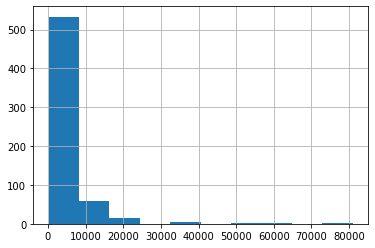

In [11]:
#for find distribution of data for loan prediction 
import matplotlib as plt
df['ApplicantIncome'].hist()

<AxesSubplot:>

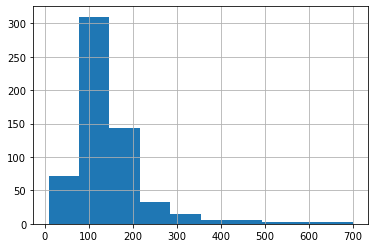

In [12]:
df['LoanAmount'].hist()

In [16]:
#groupby comparison for finding relationship between two variables 
df.groupby('Education')['ApplicantIncome'].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

<AxesSubplot:>

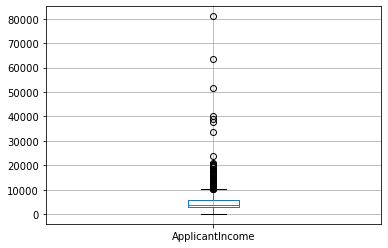

In [17]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

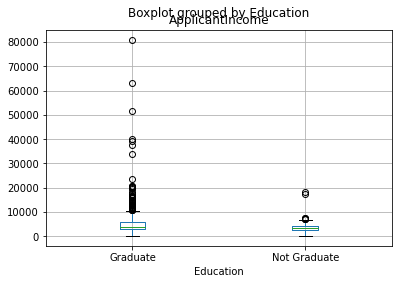

In [18]:
df.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

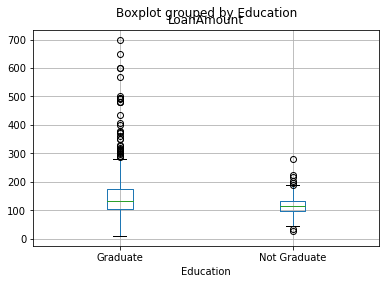

In [19]:
df.boxplot(column='LoanAmount',by='Education')

In [20]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#replacing missing values 
df['Self_Employed'].fillna('No',inplace=True)

In [22]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#dropping of data with missing values 
df.dropna(inplace=True)

In [25]:
test.dropna(inplace=True)

In [26]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']


In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


<AxesSubplot:>

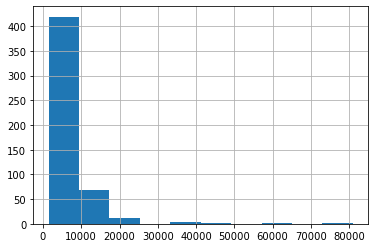

In [29]:
df['TotalIncome'].hist()

In [30]:
#understanding distribution of categorical data 
df['Loan_Status'].value_counts()

Y    353
N    152
Name: Loan_Status, dtype: int64

In [32]:
#comparing credit - history for loan status 
pd.crosstab(df['Credit_History'],df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,64,7
1.0,88,346


In [33]:
#data prepration and model buil
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

In [34]:
df.drop('Loan_ID',axis=1,inplace=True)

In [35]:
test.drop('Loan_ID',axis=1,inplace=True)

In [36]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

In [37]:
l=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in l:
    s=LabelEncoder()
    df[i]=s.fit_transform(df[i])

In [38]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
dtype: object

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0


In [40]:
t=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in t:
    s=LabelEncoder()
    test[i]=s.fit_transform(test[i])

In [41]:
test.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [43]:
#machine model 
#combine training and test data
df['Type']='Train'
test['Type']='Test'
data=pd.concat([df,test],axis=0,sort=True)
data

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,Type
1,4583,1508.0,1.0,1,0,1,128.0,360.0,0.0,1,0,0,6091.0,Train
2,3000,0.0,1.0,0,0,1,66.0,360.0,1.0,1,2,1,3000.0,Train
3,2583,2358.0,1.0,0,1,1,120.0,360.0,1.0,1,2,0,4941.0,Train
4,6000,0.0,1.0,0,0,1,141.0,360.0,1.0,0,2,0,6000.0,Train
5,5417,4196.0,1.0,2,0,1,267.0,360.0,1.0,1,2,1,9613.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2269,2167.0,1.0,1,0,1,99.0,360.0,NaN,1,1,0,NaN,Test
362,4009,1777.0,1.0,3,1,1,113.0,360.0,NaN,1,2,1,NaN,Test
363,4158,709.0,1.0,0,0,1,115.0,360.0,NaN,1,2,0,NaN,Test
365,5000,2393.0,1.0,0,0,1,158.0,360.0,NaN,1,0,0,NaN,Test


In [44]:
data.isna().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          289
Married                0
Property_Area          0
Self_Employed          0
TotalIncome          289
Type                   0
dtype: int64

In [45]:
data.dropna(inplace=True)

In [46]:
data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
TotalIncome          0
Type                 0
dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression 
r=['Credit_History','Education','Gender','Loan_Amount_Term','TotalIncome']
x=data[r]

In [51]:
x

,Credit_History,Education,Gender,Loan_Amount_Term,TotalIncome
1,1.0,0,1,360.0,6091.0
2,1.0,0,1,360.0,3000.0
3,1.0,1,1,360.0,4941.0
4,1.0,0,1,360.0,6000.0
5,1.0,0,1,360.0,9613.0
...,...,...,...,...,...
609,1.0,0,0,360.0,2900.0
610,1.0,0,1,180.0,4106.0
611,1.0,0,1,360.0,8312.0
612,1.0,0,1,360.0,7583.0


In [52]:
y=data['Loan_Status']
y

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 505, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [56]:
model=LogisticRegression()
model.fit(xtrain,ytrain)


LogisticRegression()

In [57]:
#predict output 
predictedoutput=model.predict(xtest)


In [58]:
predictedoutput

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
ytest

450    0.0
495    1.0
192    0.0
471    0.0
168    0.0
      ... 
394    1.0
501    1.0
521    1.0
288    1.0
364    1.0
Name: Loan_Status, Length: 152, dtype: float64

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictedoutput))

              precision    recall  f1-score   support

         0.0       0.88      0.31      0.45        49
         1.0       0.75      0.98      0.85       103

    accuracy                           0.76       152
   macro avg       0.82      0.64      0.65       152
weighted avg       0.79      0.76      0.72       152



In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predictedoutput)

array([[ 15,  34],
       [  2, 101]], dtype=int64)

In [64]:
#predicting with sample data 
result=model.predict([[1.0,1,0,360.0,37383.0]])
result

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])